In [50]:
import random
import math
import matplotlib.pyplot as plt
start = [random.randint(1,50) for _ in range(16)]
x = 15
y = 0
kolvo = 2500
while len(start) < kolvo:
    new_ch = ((start[x] + start[y]) % 512) # 2**9
    start.append(new_ch)
    x += 1
    y += 1
z_list =[]
i = 0
for i in range(len(start)):
    z = start[i] / 512
    z_list.append(z)

In [51]:
def plot_hist(a, bins=20, **kwargs):
    left, width = 1, 1.65
    bottom, height = 1, 1.65
    spacing = 0.005
    rect_histx = [left, bottom + height + spacing, width, 1]
    ax_histx = plt.axes(rect_histx)
    ax_histx.grid(True)
    ax_histx.tick_params(direction='in', labelbottom=True)
    ax_histx.hist(a, bins, stacked=True, **kwargs)
    
    plt.show()

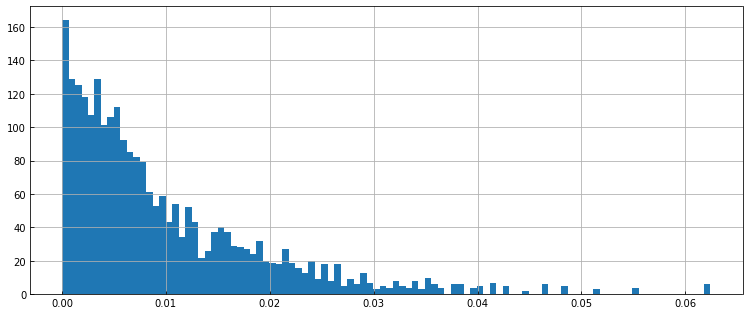

In [52]:
from math import log
xx = []
lambd = 100  # 0.01
for zz in z_list:
    try:
        xx.append((-1/lambd) * log(zz))
    except:
        pass

plot_hist(xx, bins=100)

In [53]:
m = math.fsum(xx) / kolvo # экпериментальная
print("Экпериментальное Мат. ожидание равно: {}".format(m))

mm = 1 / lambd
print("Теоритическое Мат. ожидание равно: {}".format(mm))

d = 1 / lambd*2
print("Теор Дисперсия: {}".format(d))

result = 0
for i in range(len(xx)):
    result += ((xx[i] - mm) **2)
dd = result / kolvo
print("Экспериментальная Дисперсия равна: {}".format(dd))

Экпериментальное Мат. ожидание равно: 0.009903288497209188
Теоритическое Мат. ожидание равно: 0.01
Теор Дисперсия: 0.02
Экспериментальная Дисперсия равна: 9.544377757605845e-05


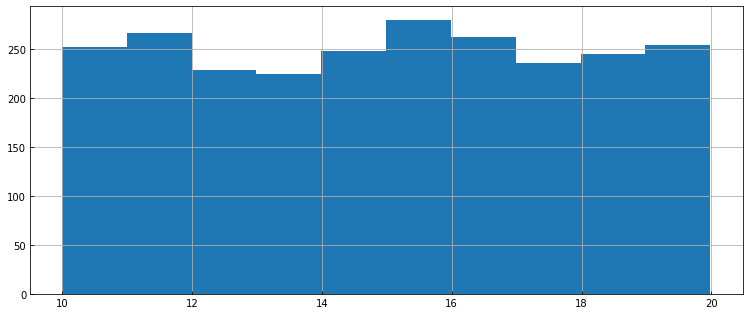

In [54]:
A = 10
B = 20
xx = []
for zz in z_list:
    xx.append(zz * (B - A) + A)

plot_hist(xx, bins=10)

In [55]:
m = (A+(B-A)/2)
print("Теоритическое Мат. ожидание равно: {}".format(m))
D = ((B - A) ** 2)/12
print("Теоритическая Дисперсия равна: {}".format(D))

mm = math.fsum(xx) / kolvo # экпериментальная
print("Экпериментальное Мат. ожидание равно: {}".format(mm))

lambd = 100
suma = 0
from math import log
for z in xx:
    xum = (-1/lambd) * log(z)
    suma = (xum - m) ** 2
    suma /= kolvo
print("Экпериментальная Дисперсия равна: {}".format(suma))

Теоритическое Мат. ожидание равно: 15.0
Теоритическая Дисперсия равна: 8.333333333333334
Экпериментальное Мат. ожидание равно: 15.0003515625
Экпериментальная Дисперсия равна: 0.09035370418327793


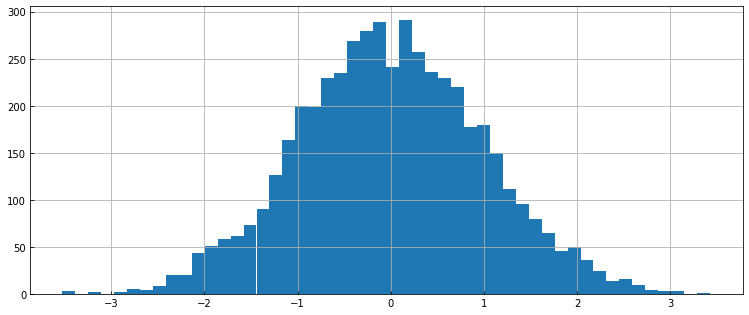

In [56]:
from math import sin, cos
from math import sqrt
from math import log
pi = 3.14
xx = []
for num, zz in enumerate(z_list):
    if num + 1 < len(z_list):
        sinus = sin(2 * pi * z_list[num+1])
        cosinus = cos(2 * pi * z_list[num+1])
        try:
            logarifm = log(zz)
            x1 = (-2 * logarifm)
            x2 = (-2 * logarifm)
            xx.append(sinus * sqrt(x1))
            xx.append(cosinus * sqrt(x2))
        except:
            pass

plot_hist(xx, bins=50)